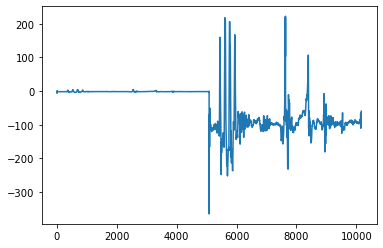

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as math


#data22 = det reele 21
data1 = pd.read_csv("hojreneddata22.csv", header=None)
data1.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]
accx = data1['accX']
accz = data1['accZ']
roty = data1['rotY']
YnMinusX = 0.0
YnMinusZ = 0.0
alpha = 0.02
g = 9.82
ax = []
az = []
YnX = []
YnZ = []
XZangle = []
angle = []
preangle = []
samplerot = []
YnRot = []
newroty = []
YnMinusY = 0.0
YnMinusXZ = 0.0
fs=0.01

for i in range(len(accx)):
    ax.append(accx[i])
    az.append(accz[i])
for i in range(len(ax)):   
    preangle.append(math.atan2(ax[i], az[i]))
for i in range(len(preangle)):
    XZangle.append((1-alpha)*YnMinusXZ+(alpha*preangle[i]))
    YnMinusXZ = preangle[i]
for i in range(len(roty)):
    newroty.append(roty[i]*(1/fs))
    YnRot.append((1-alpha)*YnMinusY+(alpha*newroty[i]))
    YminusY = YnRot[i]
for i in range(len(XZangle)):
    angle.append(YnRot[i]+XZangle[i])
    
#plt.plot(preangle) #Vinkel i radianer
#plt.plot(YnRot) #radianer 
for i in range(len(angle)):
    angle.append(angle[i]*(180/3.14))
plt.plot(angle)
plt.show()

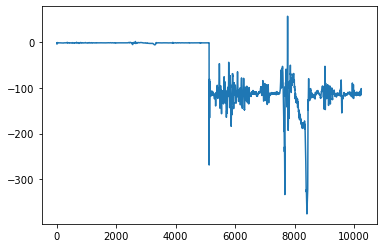

In [3]:
data2 = pd.read_csv("hojreopdata22.csv", header=None)
data2.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]
accx2 = data2['accX']
accz2 = data2['accZ']
roty2 = data2['rotY']
YnMinusX2 = 0.0
YnMinusZ2 = 0.0
alpha = 0.02
g = 9.82
ax2 = []
az2 = []
YnX2 = []
YnZ2 = []
XZangle2 = []
angle2 = []
preangle2 = []
samplerot2 = []
YnRot2 = []
newroty2 = []
YnMinusY2 = 0.0
YnMinusXZ2 = 0.0
fs=0.01

for i in range(len(accx2)):
    ax2.append(accx2[i])
    az2.append(accz2[i])
for i in range(len(ax2)):   
    preangle2.append(math.atan2(ax2[i], az2[i]))
for i in range(len(preangle2)):
    XZangle2.append((1-alpha)*YnMinusXZ2+(alpha*preangle2[i]))
    YnMinusXZ2 = preangle2[i]
for i in range(len(roty2)):
    newroty2.append(roty2[i]*(1/fs))
    YnRot2.append((1-alpha)*YnMinusY2+(alpha*newroty2[i]))
    YminusY2 = YnRot2[i]
for i in range(len(XZangle2)):
    angle2.append(YnRot2[i]+XZangle2[i])
    
#plt.plot(preangle) #Vinkel i radianer
#plt.plot(YnRot) #radianer 
for i in range(len(angle2)):
    angle2.append(angle2[i]*(180/3.14))
plt.plot(angle2)
plt.show()

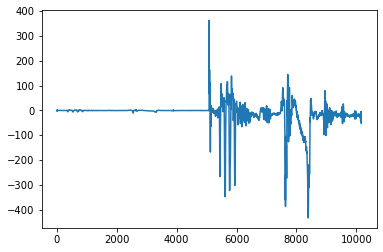

In [4]:

sumAngle = list()
#angle = angle[1000:6800]
#angle2 = angle2[1000:6800]
for item1, item2 in zip(angle2, angle):
    item = item1 - item2
    sumAngle.append(item)
#sumAngle = angle2[1000:6800] - angle[1000:6800]
#sumAngle = sumAngle - np.average(sumAngle)
#plt.plot(sumAngle)

#intAngle = np.zeros(len(sumAngle))
#oldvalue = 0

#for i in range(1, len(sumAngle)):
  #  intAnglenew = oldvalue + sumAngle[i]
  #  oldValue = intAnglenew
  #  intAngle[i] = intAnglenew

    
plt.plot(sumAngle)

In [5]:
def filterfunction(data):
    accx = data['accX']
    accz = data['accZ']
    roty = data['rotY']
    ss_angle = 0;
    alpha = 0.02
    sv= []
    for n in range(0, len(data)):
        xacc = accx[n]
        zacc = accz[n]
        ygyro = roty[n]
        
        theta = math.atan2(xacc,zacc)
        ss_angle = (1-alpha)*(ss_angle + (ygyro/104))+alpha*theta
        sv.append(ss_angle*(180/3.14))
    return sv
        
        
        



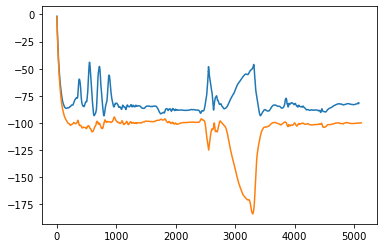

In [8]:
pp = filterfunction(data1)
pp2 = filterfunction(data2)
plt.plot(pp)
plt.plot(pp2)


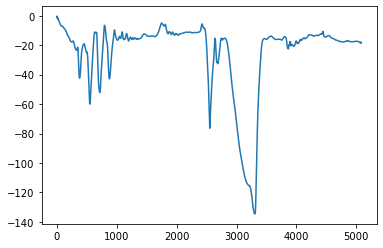

In [12]:
ppF = []

for item1, item2 in zip(pp2, pp):
    item = item1 - item2
    ppF.append(item)
plt.plot(ppF)
#Højre op minus højre ned

#Accuracy and precission

In [15]:
ppF = pd.DataFrame(ppF)
ppF.columns = ['X']
ppF.to_csv('ppF.csv')